<a href="https://colab.research.google.com/github/kkchaitu27/DeepLearning/blob/master/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **News Classification**

AG News	Xiang Zhang et al., 2015	
496,835 categorized news articles from >2000 news sources from the 4 largest classes from AG’s corpus of news articles, using only the title and description fields. The number of training samples for each class is 30,000 and testing 1900.

Achieved test error rate of 6% which is much better than 7.8% obtained in the paper. More epochs will increase the accuracy.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import fastai code

In [0]:
from fastai.text import *
import pandas as pd

Download

AG News Xiang Zhang et al., 2015
496,835 categorized news articles from >2000 news sources from the 4 largest classes from AG’s corpus of news articles, using only the title and description fields. The number of training samples for each class is 30,000 and testing 1900.



In [3]:
path = untar_data(URLs.AG_NEWS)
path.ls()

[PosixPath('/root/.fastai/data/ag_news_csv/readme.txt'),
 PosixPath('/root/.fastai/data/ag_news_csv/train.csv'),
 PosixPath('/root/.fastai/data/ag_news_csv/classes.txt'),
 PosixPath('/root/.fastai/data/ag_news_csv/test.csv')]

Open readme text present in the download

In [4]:
cat /root/.fastai/data/ag_news_csv/readme.txt

AG's News Topic Classification Dataset

Version 3, Updated 09/09/2015


ORIGIN

AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity. For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above. It is used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in 

Viewing 4 classes present in the dataset

In [5]:
cat /root/.fastai/data/ag_news_csv/classes.txt

World
Sports
Business
Sci/Tech


Loading train.csv with columns of class, title and description.

In [6]:
df_train = pd.read_csv(path/'train.csv',  names=["class", "title", "description"])
df_train.head()

,class,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Loading test.csv with columns of class, title and description.

In [7]:
df_test = pd.read_csv(path/'test.csv',  names=["class", "title", "description"])
df_test.head()

,class,title,description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


Appending train and test datasets to train character level model using transfer learing of wikipedia text dataset model.

In [0]:
df = df_train.append(df_test, ignore_index=True)

Giving title and description columns for language modeling.

In [0]:
data_lm = (TextList.from_df(df, path, cols=['title', 'description'])
                .split_by_rand_pct(0.1)
                .label_for_lm()
                .databunch(bs=64))

Save language model.

In [0]:
data_lm.save("data_lm")

Load language model.

In [0]:
data_lm = load_data(path, 'data_lm')

Length of train and test datasets

In [12]:
len(data_lm.train_ds), len(data_lm.valid_ds)

(114840, 12760)

Viewing a batch in the language model dataset.

In [13]:
data_lm.show_batch()

idx,text
0,' xxmaj outlook ( xxmaj reuters ) xxmaj reuters - xxmaj soaring crude prices plus worries \ about the economy and the outlook for earnings are expected to \ hang over the stock market next week during the depth of the \ summer doldrums . xxbos xxmaj iraq xxmaj halts xxmaj oil xxmaj exports from xxmaj main xxmaj southern xxmaj pipeline ( xxmaj reuters ) xxmaj reuters - xxmaj authorities
1,"the testing would be abandoned , critics said xxmaj tuesday . xxbos xxmaj americans xxmaj settle for 1 - 1 xxmaj tie xxmaj with xxmaj aussies xxup thessaloniki , xxmaj greece - xxmaj the xxup u.s. women 's soccer team needed only a tie xxmaj tuesday and that 's all it got - settling for a draw against a team it had always beaten ... xxbos xxmaj ill. xxmaj plans"
2,"xxmaj shares of xxup jjb xxmaj sports xxmaj plc , xxmaj britain 's largest sporting - goods retailer , had their biggest decline in at least two years after the company said profit this fiscal year may be about 20 percent less than forecast amid declining sales . xxbos xxmaj workplace beware xxup the xxup labor xxmaj department 's trumpeting of its new regulations governing overtime , which go into"
3,"xxmaj friday . xxbos xxmaj najaf xxmaj standoff xxmaj continues xxmaj shi ' ite militiamen continue to occupy the xxmaj imam xxmaj ali shrine in the xxmaj iraqi city of xxmaj najaf , despite religious authorities ' efforts to end the 17-day standoff . xxbos xxmaj more xxmaj violence in xxmaj nepal on 4th xxmaj day of xxmaj rebel xxmaj blockade xxmaj in xxmaj nepal , fresh violence has erupted"
4,"cut about 3,000 jobs at xxmaj abbey xxmaj national as part of a cost - saving plan if its friendly takeover bid succeeds . xxbos xxmaj the xxup u.s. xxmaj grabs the xxmaj gold in xxmaj softball xxup athens ( xxmaj reuters ) - xxmaj the xxmaj united xxmaj states softball team came into xxmaj athens on a simple mission -- take home their third straight gold medal or call"


Viewing a sample data

In [14]:
data_lm.train_ds[100][0]

Text xxbos xxmaj ants xxmaj form xxmaj xxunk xxmaj spanning 60 xxmaj miles ( xxup ap ) xxup ap - xxmaj normally xxunk and xxunk xxmaj argentine ants have become so laid back since arriving in xxmaj australia decades ago that they no longer fight neighboring nests and have formed a xxunk here that spans 60 miles , scientists say .

Viweing vocabulary for the language model.

In [15]:
data_lm.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

Batch Size for the language model.

In [16]:
data_lm.batch_size

64

Creating a language model learner.

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

Finding optimum learning rate

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Plot of the learning rate finder

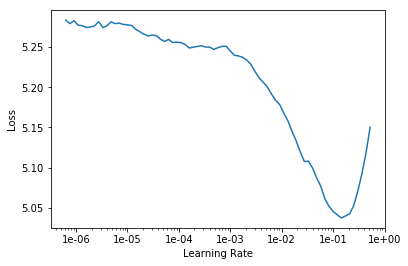

In [19]:
learn.recorder.plot(skip_end=15)

Language Model for one epoch.

In [20]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.562102,3.357346,0.402387,14:53


Save the model.

In [0]:
learn.save('fit_head')

Load the model.

In [0]:
learn.load('fit_head');

Unfreeze all the layers in the model.

In [0]:
learn.unfreeze()

Train for 10 epochs to improve accuracy

In [24]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.072685,3.131366,0.429960,17:18
1,2.957141,2.994036,0.449245,17:18
2,2.841051,2.908439,0.460622,17:18
3,2.696838,2.846003,0.472022,17:18
4,2.539587,2.812414,0.479169,17:18
5,2.434822,2.792399,0.485186,17:18
6,2.285687,2.782584,0.489510,17:18
7,2.165512,2.785569,0.491853,17:18
8,2.069123,2.793563,0.492955,17:18
9,2.029353,2.799675,0.492967,17:18


Save the fine tuned model.

In [0]:
learn.save('fine_tuned')

Load the fine tuned model.

In [26]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (114840 items)
x: LMTextList
xxbos xxmaj carlyle xxmaj looks xxmaj toward xxmaj commercial xxmaj aerospace ( xxmaj reuters ) xxmaj reuters - xxmaj private investment firm xxmaj carlyle xxmaj group , \ which has a reputation for making well - timed and occasionally \ controversial plays in the defense industry , has quietly placed \ its bets on another part of the market .,xxbos xxmaj oil and xxmaj economy xxmaj cloud xxmaj stocks ' xxmaj outlook ( xxmaj reuters ) xxmaj reuters - xxmaj soaring crude prices plus worries \ about the economy and the outlook for earnings are expected to \ hang over the stock market next week during the depth of the \ summer doldrums .,xxbos xxmaj iraq xxmaj halts xxmaj oil xxmaj exports from xxmaj main xxmaj southern xxmaj pipeline ( xxmaj reuters ) xxmaj reuters - xxmaj authorities have halted oil export \ flows from the main pipeline in southern xxmaj iraq after \ intelligence showed a rebel militia 

Save the fine tuned model encoder.

In [0]:
learn.save_encoder('fine_tuned_enc')

# **News Classification**

Create dataset for the classification task.

In [0]:
data_class = TextDataBunch.from_df(path, train_df = df_train, 
                                   valid_df = df_test, vocab = data_lm.vocab, 
                                   text_cols=['title','description'], label_cols="class", bs=64)
data_class.save('data_clas.pkl')

Load pickle file of the dataset

In [0]:
data_class = load_data(path, 'data_clas.pkl', bs=64)

Show batch data of the dataset

In [31]:
data_class.show_batch()

text,target
"xxbos xxmaj kyoto is xxmaj dead - xxmaj long xxmaj live xxmaj pragmatism xxmaj there 's troubling news ( xxup ft subscription xxunk , alternate copy here ) coming from xxmaj japan , where the xxmaj kyoto protocol on xxmaj greenhouse xxmaj emissions was born in 1997 . xxmaj it seems that the xxmaj japanese are n't going to be able to meet their emissions targets specified in the agreement",4
"xxbos xxup sbc switches on xxmaj microsoft in major xxup iptv deal xxmaj microsoft has turned the channel on its slow - moving television software business by winning a key contract for its new xxmaj internet - based xxup tv platform from xxup sbc xxmaj xxunk > xxup advertisement < / p><p><img src=""http : / / ad.doubleclick.net / ad / idg.us.ifw.general / solaris;sz=1x1;ord=200301151450 ? "" width=""1 "" height=""1 "" border=""0",4
"xxbos xxmaj siebel creates cheaper , xxup smb software version xxmaj siebel xxmaj xxunk quietly introduced a version of its xxup crm ( customer relationship management ) sales software tailored for midmarket xxunk > xxup advertisement < / p><p><img src=""http : / / ad.doubleclick.net / ad / idg.us.ifw.general / solaris;sz=1x1;ord=200301151450 ? "" width=""1 "" height=""1 "" border=""0 "" / > < a href=""http : / / ad.doubleclick.net / clk;12204780;10550054;n?http :",4
"xxbos xxmaj another xxmaj four xxmaj horrible xxmaj years . \ \ i 'm not sure what to think about this news . i 'm still stunned . i woke up this \ morning feeling betrayed , and shocked . \ \ xxmaj how could so many xxmaj americans be out of touch with reality ? xxmaj how could so many \ xxmaj americans be so xxunk ? xxmaj how",4
"xxbos xxmaj al xxmaj qaeda member surrenders \ "" xxup riyadh , xxmaj saudi xxmaj arabia ( xxup cnn ) -- xxmaj one of xxmaj saudi xxmaj arabia 's most wanted militants has \ turned himself into the authorities , the first senior suspect to surrender under \ a one - month government amnesty announced last week . "" \ "" xxmaj othman xxmaj al - xxmaj xxunk , number",4


Create learner for the classification task.

In [32]:
learn = text_classifier_learner(data_class, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (120000 items)
x: TextList
xxbos xxmaj wall xxmaj st. xxmaj bears xxmaj claw xxmaj back xxmaj into the xxmaj black ( xxmaj reuters ) xxmaj reuters - xxmaj short - sellers , xxmaj wall xxmaj street 's dwindling \ band of ultra - cynics , are seeing green again .,xxbos xxmaj carlyle xxmaj looks xxmaj toward xxmaj commercial xxmaj aerospace ( xxmaj reuters ) xxmaj reuters - xxmaj private investment firm xxmaj carlyle xxmaj group , \ which has a reputation for making well - timed and occasionally \ controversial plays in the defense industry , has quietly placed \ its bets on another part of the market .,xxbos xxmaj oil and xxmaj economy xxmaj cloud xxmaj stocks ' xxmaj outlook ( xxmaj reuters ) xxmaj reuters - xxmaj soaring crude prices plus worries \ about the economy and the outlook for earnings are expected to \ hang over the stock market next week during the depth of the \ summer doldrums .,xxbos xxmaj iraq xxmaj halts xxmaj oil xxm

Find optimum learning rate

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Obtain learning rates from the recorder plot.

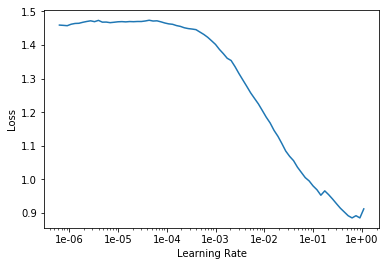

In [34]:
learn.recorder.plot()

Train the model for one cycle and one epoch.

In [35]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.339502,0.259225,0.911842,04:08


Save the first model trained.

In [0]:
learn.save('first')

Load the first model.

In [37]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (120000 items)
x: TextList
xxbos xxmaj wall xxmaj st. xxmaj bears xxmaj claw xxmaj back xxmaj into the xxmaj black ( xxmaj reuters ) xxmaj reuters - xxmaj short - sellers , xxmaj wall xxmaj street 's dwindling \ band of ultra - cynics , are seeing green again .,xxbos xxmaj carlyle xxmaj looks xxmaj toward xxmaj commercial xxmaj aerospace ( xxmaj reuters ) xxmaj reuters - xxmaj private investment firm xxmaj carlyle xxmaj group , \ which has a reputation for making well - timed and occasionally \ controversial plays in the defense industry , has quietly placed \ its bets on another part of the market .,xxbos xxmaj oil and xxmaj economy xxmaj cloud xxmaj stocks ' xxmaj outlook ( xxmaj reuters ) xxmaj reuters - xxmaj soaring crude prices plus worries \ about the economy and the outlook for earnings are expected to \ hang over the stock market next week during the depth of the \ summer doldrums .,xxbos xxmaj iraq xxmaj halts xxmaj oil xxm

Freeze till -2 layer and train the model.

In [38]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.257593,0.201070,0.929605,04:59


Save the second model trained above.

In [0]:
learn.save('second')

Load the second model trained.

In [0]:
learn.load('second');

Freeze till -3 layer and train the model.

In [41]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.213640,0.179747,0.938947,08:17


Save the third model.

In [0]:
learn.save('third')

Load the third model.

In [43]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (120000 items)
x: TextList
xxbos xxmaj wall xxmaj st. xxmaj bears xxmaj claw xxmaj back xxmaj into the xxmaj black ( xxmaj reuters ) xxmaj reuters - xxmaj short - sellers , xxmaj wall xxmaj street 's dwindling \ band of ultra - cynics , are seeing green again .,xxbos xxmaj carlyle xxmaj looks xxmaj toward xxmaj commercial xxmaj aerospace ( xxmaj reuters ) xxmaj reuters - xxmaj private investment firm xxmaj carlyle xxmaj group , \ which has a reputation for making well - timed and occasionally \ controversial plays in the defense industry , has quietly placed \ its bets on another part of the market .,xxbos xxmaj oil and xxmaj economy xxmaj cloud xxmaj stocks ' xxmaj outlook ( xxmaj reuters ) xxmaj reuters - xxmaj soaring crude prices plus worries \ about the economy and the outlook for earnings are expected to \ hang over the stock market next week during the depth of the \ summer doldrums .,xxbos xxmaj iraq xxmaj halts xxmaj oil xxm

Unfreeze all the layers and train the model.

In [44]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.155242,0.178850,0.938684,11:11
1,0.142442,0.174637,0.940921,11:12


In [45]:
learn.predict("Cricket is a good game. It has eleven players for each team. Two teams play at a time")

(Category 2, tensor(1), tensor([0.0044, 0.9887, 0.0024, 0.0046]))